In [1]:
import numpy as np
import sep
# additional setup for reading the test image and displaying plots
#import fitsio
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [18., 15.]

In [2]:
# read image into standard 2-d numpy array
hdu = fits.open("../maps_fits/b'iDR4_3_MC0114_0562811'_halpha_v1.fits")
hdu[0].data

array([[1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       ...,
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17],
       [1.e-17, 1.e-17, 1.e-17, ..., 1.e-17, 1.e-17, 1.e-17]],
      dtype=float32)

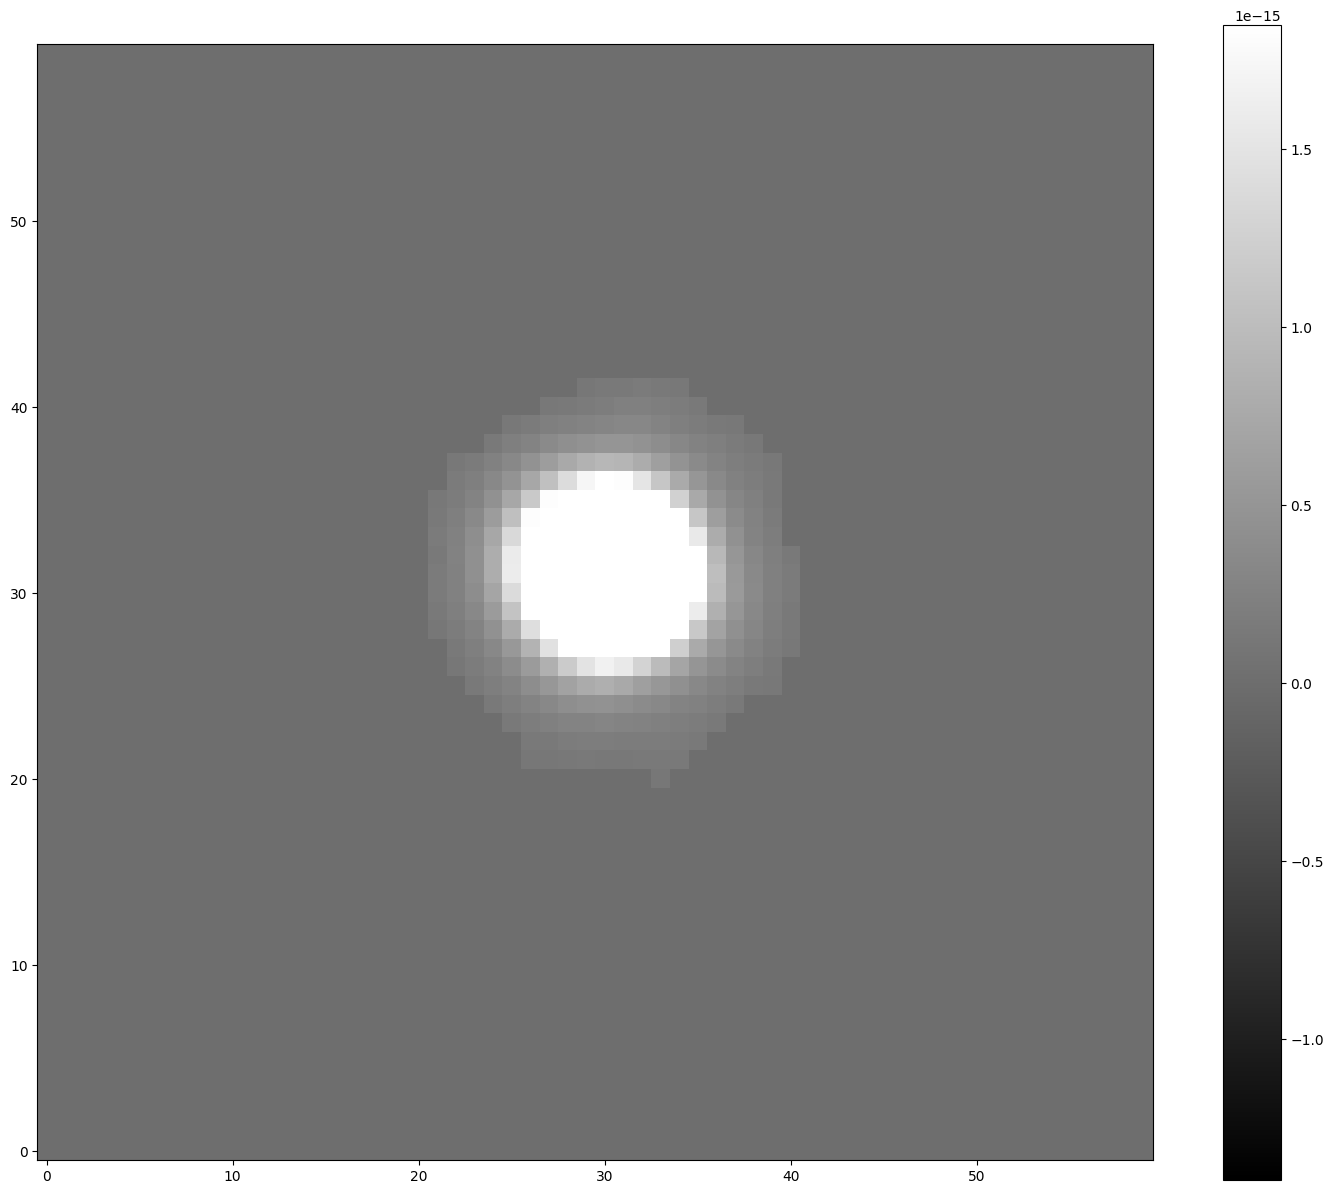

In [3]:
# show the image
m, s = np.mean(hdu[0].data), np.std(hdu[0].data)
plt.imshow(hdu[0].data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
#plt.savefig("difference_Ha.jpg")

Applying Sep

In [4]:
data_ = hdu[0].data
data_ = data_.byteswap().newbyteorder()
try:
    obj = sep.extract(data_, -0.5, err=None)
except:
    print("Nathing to do")

In [5]:
len(obj)

1

In [6]:
#objects = sep.extract(data_, 1, err=None)

In [7]:
obj

array([(-0.5, 3600, 3600, 0, 59, 0, 59, 30.26508848, 30.98739304, 19.50631265, 19.64919354, -0.07800366, 0., 0., 0., 4.43661213, 4.41270638, -1.15615261, 0.05126627, 0.05089348, 0.00040704, 8.16342599e-13, 8.16940049e-13, 2.47454407e-14, 2.84361903e-14, 30, 31, 30, 31, 2)],
      dtype=[('thresh', '<f8'), ('npix', '<i8'), ('tnpix', '<i8'), ('xmin', '<i8'), ('xmax', '<i8'), ('ymin', '<i8'), ('ymax', '<i8'), ('x', '<f8'), ('y', '<f8'), ('x2', '<f8'), ('y2', '<f8'), ('xy', '<f8'), ('errx2', '<f8'), ('erry2', '<f8'), ('errxy', '<f8'), ('a', '<f8'), ('b', '<f8'), ('theta', '<f8'), ('cxx', '<f8'), ('cyy', '<f8'), ('cxy', '<f8'), ('cflux', '<f8'), ('flux', '<f8'), ('cpeak', '<f8'), ('peak', '<f8'), ('xcpeak', '<i8'), ('ycpeak', '<i8'), ('xpeak', '<i8'), ('ypeak', '<i8'), ('flag', '<i8')])

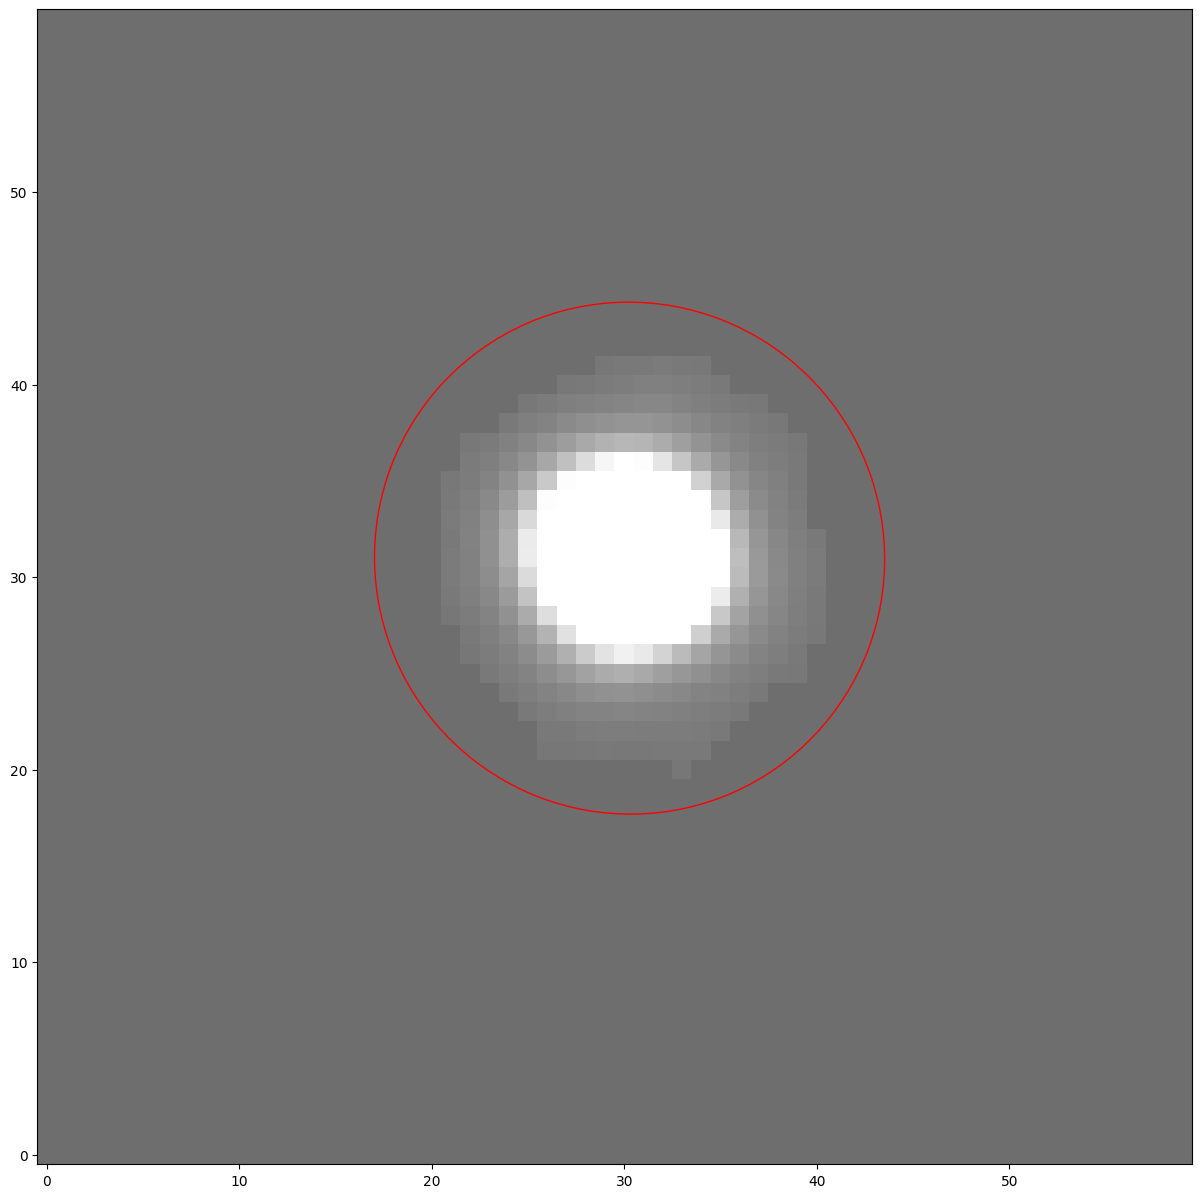

In [8]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_), np.std(data_)
im = ax.imshow(data_, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(obj)):
    e = Ellipse(xy=(obj['x'][i], obj['y'][i]),
                width=6*obj['a'][i],
                height=6*obj['b'][i],
                angle=obj['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

# Making Photometry

In [17]:
# sum flux in circles of radius=3.0
flux, fluxerr, flag = sep.sum_circle(data_, obj['x'], obj['y'], 3.0)

In [18]:
print("Flux", flux)
print("Flux error", fluxerr)
print("Flag", flag)

Flux [4.56818487e-13]
Flux error [0.]
Flag [0]


In [19]:
# use a different subpixel sampling (default is 5; 0 means "exact")
flux, fluxerr, flag = sep.sum_circle(data_, obj['x'], obj['y'], 3.0,
                                     subpix=0)

In [20]:
flux

array([4.57226457e-13])

In [21]:
r, flag = sep.flux_radius(data_, obj['x'], obj['y'], 6.*obj['a'], 0.5,
                          normflux=flux, subpix=5)

In [23]:
flag

array([0], dtype=int16)